In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import plot_confusion_matrix


### I denna undersökning ska kunder analyseras och prediktioner på vilka som lämnar (churnar) ska göras. Ett neuralt nätverk skall användas för att göra prediktionerna

In [133]:
def any_duplicates(data:str) -> str:
    """
        Prints whether or not there are duplicates.
    """
    import pandas as pd
    
    list_with_false_true = pd.DataFrame.duplicated(data)
    any_true = list_with_false_true.any()
    if any_true:
        print("Number of duplicates: ", list_with_false_true.value_counts()[1] )
    else:
        print("No duplicates found")

In [134]:
def encode_columns(df):
    columns = df.columns
    for c in columns:
        le = LabelEncoder()
        le.fit(df[c])
        df[c] = le.transform(df[c])
    return df

### Läser av datasetet

In [135]:
churn_test_df = pd.read_csv("C:/Users/danij/OneDrive/Machine Learning/Matematik/LinearRegression/Uppgift8/churn_test2.csv")
churn_train_df = pd.read_csv("C:/Users/danij/OneDrive/Machine Learning/Matematik/LinearRegression/Uppgift8/churn_train2.csv")

### Analyserar churn_train datan
Datan har 21 attribut och 5634 st personer.
Hittade inga dubletter eller konstiga värden. Dock har den saknade värden i "TotalCharges" som måste fixas

In [136]:
churn_train_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1768-ZAIFU,Female,1,No,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,25.20,25.2,Yes
1,2159-TURXX,Male,0,No,No,5,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),20.05,95.55,No
2,8261-GWDBQ,Female,1,Yes,No,60,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),116.05,6925.9,No
3,2732-ISEZX,Female,0,No,No,5,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.50,104.3,No
4,7607-QKKTJ,Male,0,Yes,Yes,45,Yes,Yes,Fiber optic,No,...,Yes,No,No,Yes,One year,Yes,Credit card (automatic),95.00,4368.85,No


In [137]:
churn_train_df.shape

(5634, 21)

In [138]:
churn_train_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [139]:
churn_train_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [140]:
churn_train_df.isna().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [141]:
any_duplicates(churn_train_df)

No duplicates found


In [142]:
for column in churn_train_df.columns:
    print( column,  len(churn_train_df[churn_train_df[column] == ' '].index) )

customerID 0
gender 0
SeniorCitizen 0
Partner 0
Dependents 0
tenure 0
PhoneService 0
MultipleLines 0
InternetService 0
OnlineSecurity 0
OnlineBackup 0
DeviceProtection 0
TechSupport 0
StreamingTV 0
StreamingMovies 0
Contract 0
PaperlessBilling 0
PaymentMethod 0
MonthlyCharges 0
TotalCharges 8
Churn 0


<AxesSubplot:>

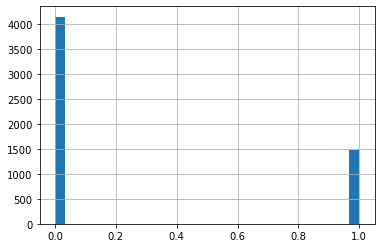

In [160]:
churn_train_df["Churn"].hist(bins=30)

### Analyserar churn_test datan

Datan har också 21 attribut men mindre antal personer, 1409 st.
Hittade inga dubletter eller konstiga värden här heller,  dock har den också saknade värden i "TotalCharges" som skall fixas.

In [143]:
churn_test_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,9505-SQFSW,Female,0,Yes,Yes,3,No,No phone service,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,40.30,92.5,No
1,1723-HKXJQ,Male,0,No,No,42,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,101.75,4273.45,Yes
2,9154-QDGTH,Male,0,Yes,Yes,43,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic),104.30,4451.85,No
3,8309-IEYJD,Female,1,No,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.60,70.6,No
4,8775-CEBBJ,Female,0,No,No,9,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes


In [144]:
churn_test_df.shape

(1409, 21)

In [145]:
churn_test_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [146]:
churn_test_df.isna().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [147]:
any_duplicates(churn_test_df)

No duplicates found


In [148]:
for column in churn_test_df.columns:
    print( column,  len(churn_test_df[churn_test_df[column] == ' '].index)) 

customerID 0
gender 0
SeniorCitizen 0
Partner 0
Dependents 0
tenure 0
PhoneService 0
MultipleLines 0
InternetService 0
OnlineSecurity 0
OnlineBackup 0
DeviceProtection 0
TechSupport 0
StreamingTV 0
StreamingMovies 0
Contract 0
PaperlessBilling 0
PaymentMethod 0
MonthlyCharges 0
TotalCharges 3
Churn 0


<AxesSubplot:>

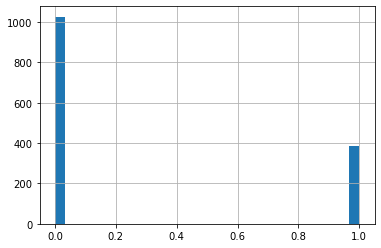

In [161]:
churn_test_df["Churn"].hist(bins=30)

### Förberedning av datan

Ändrar null/saknade värden från "TotalCharges" till 0 och tar bort "customerID" då den inte gör nytta i undersökningen. 

In [149]:
churn_train_df['TotalCharges'] = churn_train_df.TotalCharges.replace({' ': 0})
churn_train_df['TotalCharges'] = pd.to_numeric(churn_train_df.TotalCharges, errors='coerce')

churn_train_df = churn_train_df.drop('customerID', axis=1)

In [150]:
churn_test_df['TotalCharges'] = churn_test_df.TotalCharges.replace({' ': 0})
churn_test_df['TotalCharges'] = pd.to_numeric(churn_test_df.TotalCharges, errors='coerce')

churn_test_df = churn_test_df.drop('customerID', axis=1)

### Encodar strängar till integers och sparar i 2 nya variabler

In [151]:
train_df = encode_columns(churn_train_df)
test_df = encode_columns(churn_test_df)

### Tränar 5 st MLPClassifier

Som vi kan se tar det mest tid för den tredje mlp_classifier att köras, 12.2 sekunder, och minst tid för mlp_classifier nummer ett med sina 1.7 sekunder.

In [152]:
x_train = train_df.drop(columns="Churn")
y_train = train_df.Churn

x_test = test_df.drop(columns="Churn")
y_test = test_df.Churn

In [153]:
mlp_clf_1 = MLPClassifier(learning_rate_init= 0.01, hidden_layer_sizes = (5,5,5,5), random_state=42)
mlp_clf_1.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=(5, 5, 5, 5), learning_rate_init=0.01,
              random_state=42)

In [154]:
mlp_clf_2 = MLPClassifier(learning_rate_init= 0.01, hidden_layer_sizes = (100,100), random_state=42)
mlp_clf_2.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 100), learning_rate_init=0.01,
              random_state=42)

In [155]:
mlp_clf_3 = MLPClassifier(learning_rate_init= 0.01, hidden_layer_sizes = (100,100,100,100,100,100,100,100,100,100), random_state=42)
mlp_clf_3.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 100, 100, 100, 100, 100, 100, 100, 100,
                                  100),
              learning_rate_init=0.01, random_state=42)

In [156]:
mlp_clf_4 = MLPClassifier(learning_rate_init= 0.0001, hidden_layer_sizes = (100,100), random_state=42)
mlp_clf_4.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 100), learning_rate_init=0.0001,
              random_state=42)

In [157]:
mlp_clf_5 = MLPClassifier(learning_rate_init= 0.00001, hidden_layer_sizes = (100,100), random_state=42)
mlp_clf_5.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 100), learning_rate_init=1e-05,
              random_state=42)

### Accuracy score
Ligger på 0.54 vilket är dåligt. Det behövs lite ändringar i antingen modellen eller att man måste ändra sättet vi encodar datan, det vill säga testa att "one hot" enkoda istället.

In [158]:
test_clf = MLPClassifier(random_state=42)
test_clf.fit(x_train, y_train)

test_clf.score(x_test, y_test)

0.5443577004968062

### Confusion Matrix
Prediktade 601 st på 1 då den riktiga svaret är 0, och 41st på 0 då den riktiga svaret är 1. Tillsammans blir det 642 st fel prediktade churnar, vilket är nästan hälften så mycket av testdatan. 
Det här borde stämma rätt då vår modell fick dålig resultat på accuracy score. Å andra sidan kan det bli fel prediktad på grund av att det är inte jämt fördelad på target datan det vill säga "Churn", då det finns flera nollor än ettor. 

c:\Users\danij\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


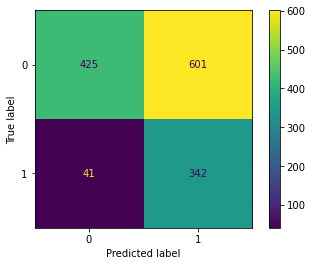

In [159]:
plot_confusion_matrix(test_clf, x_test, y_test)